# EDA 

### Referencia

#### https://www.kaggle.com/piantic/osic-pulmonary-fibrosis-progression-basic-eda

In [1]:
import os
from os import listdir
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from cv2 import imwrite
%matplotlib inline

#plotly
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


#color
from colorama import Fore, Back, Style

# Ajustes para parcelas muy bonitas
plt.style.use('fivethirtyeight')
plt.show()

In [2]:
# Lista de archivos disponibles
list(os.listdir("../challenge"))

['.ipynb_checkpoints',
 'DataSet',
 'Imagenes',
 'Reto 2.ipynb',
 'Reto.ipynb',
 'Reto_Final EDA, DataSet, Data Augmentation.ipynb',
 'Reto_Final_Modelo.ipynb',
 'sample_submission.csv',
 'test',
 'test.csv',
 'tmp',
 'train',
 'train.csv']

In [3]:
IMAGE_PATH = "../challenge/"

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(Fore.YELLOW + 'Datos de entrenamiento en forma: ',Style.RESET_ALL,train_df.shape)
train_df.head(5)

Datos de entrenamiento en forma:   (1549, 7)


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


# Adición de la columna State

In [4]:
labels = []

for i in train_df["Percent"]:
    
    if i >= 80:
        labels.append("Normal")
    elif i >= 65 and i < 80:
        labels.append("Slight")
    elif i >= 50 and i < 65:
        labels.append("moderated")
    elif i >= 35 and i < 50:
        labels.append("severe")
    elif i < 35:
        labels.append("very serious")

train_df["State"] = labels

In [5]:
train_df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,State
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker,moderated
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker,moderated
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker,moderated
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker,moderated
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker,moderated
...,...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked,Slight
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked,Slight
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked,Slight
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked,Slight


In [6]:
train_df["State"].value_counts()

Normal          628
Slight          467
moderated       402
severe           48
very serious      4
Name: State, dtype: int64

In [7]:
labels = []

for i in test_df["Percent"]:
    
    if i >= 80:
        labels.append("Normal")
    elif i >= 65 and i < 80:
        labels.append("Slight")
    elif i >= 50 and i < 65:
        labels.append("moderated")
    elif i >= 35 and i < 50:
        labels.append("severe")
    elif i < 35:
        labels.append("very serious")

test_df["State"] = labels

In [8]:
test_df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,State
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker,Slight
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker,Normal
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker,Slight
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker,Slight
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked,Slight


In [9]:
test_df["State"].value_counts()

Slight    4
Normal    1
Name: State, dtype: int64

In [10]:
# Valores nulos y tipos de datos
print(Fore.RED + 'Train Set !!',Style.RESET_ALL)
print(train_df.info())
print('-------------')
print(Fore.BLUE + 'Test Set !!',Style.RESET_ALL)
print(test_df.info())

Train Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
 7   State          1549 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 96.9+ KB
None
-------------
Test Set !! 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        5 non-null      object 
 1   Weeks          5 non-null      int64  
 2   FVC            5 non-null      int64  
 3   Percent        5 non

In [11]:
train_df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
State            0
dtype: int64

In [12]:
test_df.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
State            0
dtype: int64

In [13]:
# Número total de pacientes en el conjunto de datos(train+test)

print(Fore.YELLOW +"Total de pacientes en el conjunto de Entrenamiento: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.BLUE +"Total de pacientes en el conjunto de pruebas: ",Style.RESET_ALL,test_df['Patient'].count())

Total de pacientes en el conjunto de Entrenamiento:   1549
Total de pacientes en el conjunto de pruebas:   5


In [21]:
print(Fore.YELLOW + "El total de las identificaciones de los pacientes son",Style.RESET_ALL,f"{train_df['Patient'].count()},", Fore.BLUE + "de las cuales las identificaciones únicas son", Style.RESET_ALL, f"{train_df['Patient'].value_counts().shape[0]}.")

El total de las identificaciones de los pacientes son  1549, de las cuales las identificaciones únicas son  176.


In [22]:
train_patient_ids = set(train_df['Patient'].unique())
test_patient_ids = set(test_df['Patient'].unique())

train_patient_ids.intersection(test_patient_ids)

{'ID00419637202311204720264',
 'ID00421637202311550012437',
 'ID00422637202311677017371',
 'ID00423637202312137826377',
 'ID00426637202313170790466'}

In [25]:
len(train_patient_ids)

176

In [26]:
# Vemos a 5 pacientes en el Dataframe de Test que se pueden encontrar en el Dataframe de Train también.

In [27]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus', 'State']


In [28]:
train_df['Patient'].value_counts().max()

10

In [29]:
# En el Dataframe Train, hay varias filas para un "Paciente". Porque el paciente tiene diferentes semanas, FVC, porcentaje.

In [30]:
test_df['Patient'].value_counts().max()

1

In [31]:
#En el Dataframe de Test, podemos ver un paciente y eso significa que la identificación del paciente es única.

In [21]:
files = folders = 0

path = "train"

for r, dirnames, filenames in os.walk(path):
    files += len(filenames)
    folders += len(dirnames)
print(Fore.YELLOW +f'{files:,}',Style.RESET_ALL,"archivos/imágenes, " + Fore.BLUE + f'{folders:,}',Style.RESET_ALL ,'carpetas/pacientes')

33,026  archivos/imágenes, 176  carpetas/pacientes


In [22]:
files = []
for r, dirnames, filenames in os.walk(path):
    files.append(len(filenames))

print(Fore.YELLOW +f'{round(np.mean(files)):,}',Style.RESET_ALL,'promedio de archivos/imágenes por paciente')
print(Fore.BLUE +f'{round(np.max(files)):,}',Style.RESET_ALL, 'máximo de archivos/imágenes por paciente')
print(Fore.GREEN +f'{round(np.min(files)):,}',Style.RESET_ALL,'minimo archivos/imágenes por paciente')

187.0  promedio de archivos/imágenes por paciente
1,018  máximo de archivos/imágenes por paciente
0  minimo archivos/imágenes por paciente


# EDA con Pandas Profile Report 

In [44]:
import pandas_profiling as pdp

In [45]:
profile_train_df = pdp.ProfileReport(train_df)
profile_train_df

# Dataframe para los pacientes unicos

In [23]:
#para 176 pacientes únicos, hacemos un nuevo dataframe
patient_df = train_df[['Patient', 'Age', 'Sex', 'SmokingStatus']].drop_duplicates().sort_values('Patient').reset_index(drop=True)
patient_df.head(20)

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
1,ID00009637202177434476278,69,Male,Ex-smoker
2,ID00010637202177584971671,60,Male,Ex-smoker
3,ID00011637202177653955184,72,Male,Ex-smoker
4,ID00012637202177665765362,65,Male,Never smoked
5,ID00014637202177757139317,56,Male,Ex-smoker
6,ID00015637202177877247924,71,Male,Ex-smoker
7,ID00019637202178323708467,83,Female,Ex-smoker
8,ID00020637202178344345685,66,Female,Never smoked
9,ID00023637202179104603099,71,Female,Ex-smoker


In [24]:
# Creando listas de pacientes únicas y sus propiedades. 
train_dir = 'train/'
test_dir = 'test/'

patient_ids = os.listdir(train_dir)
patient_ids = sorted(patient_ids)

# Creando nuevas columnas
number_of_instances = []
age = []
sex = []
smoking_status = []

for patient_id in patient_ids:
    patient_info = train_df[train_df['Patient'] == patient_id].reset_index()
    number_of_instances.append(len(os.listdir(train_dir + patient_id)))
    age.append(patient_info['Age'][0])
    sex.append(patient_info['Sex'][0])
    smoking_status.append(patient_info['SmokingStatus'][0])

# Creando el Dataframe para la información del paciente 
patient_df = pd.DataFrame(list(zip(patient_ids, number_of_instances, age, sex, smoking_status)), 
                                 columns =['Patient', 'number_of_instances', 'Age', 'Sex', 'SmokingStatus'])
print(patient_df.info())
patient_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient              176 non-null    object
 1   number_of_instances  176 non-null    int64 
 2   Age                  176 non-null    int64 
 3   Sex                  176 non-null    object
 4   SmokingStatus        176 non-null    object
dtypes: int64(2), object(3)
memory usage: 7.0+ KB
None


,Patient,number_of_instances,Age,Sex,SmokingStatus
0,ID00007637202177411956430,30,79,Male,Ex-smoker
1,ID00009637202177434476278,394,69,Male,Ex-smoker
2,ID00010637202177584971671,106,60,Male,Ex-smoker
3,ID00011637202177653955184,31,72,Male,Ex-smoker
4,ID00012637202177665765362,49,65,Male,Never smoked


# Gráficos de Datos

In [25]:
patient_df['SmokingStatus'].value_counts()

Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

In [26]:
patient_df['SmokingStatus'].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribución de la columna "SmokingStatus" en el DataFrame patient')

In [27]:
train_df['FVC'].iplot(kind='hist',
                      xTitle='Capacidad pulmonar(ml)', 
                      linecolor='black', 
                      opacity=0.8,
                      color='#FB8072',
                      bargap=0.5,
                      gridcolor='white',
                      title='Distribución de la FVC en el set train')

In [28]:
train_df['State'].iplot(kind='hist',
                              xTitle='State', 
                              yTitle='Counts',
                              linecolor='black', 
                              opacity=0.7,
                              color='#FB8072',
                              theme='pearl',
                              bargap=0.2,
                              gridcolor='white',
                              title='Distribución del State en el set train')

In [29]:
train_df['Percent'].value_counts()

83.282505     2
86.559510     2
121.595445    2
80.474296     2
61.885639     2
             ..
82.589902     1
65.508606     1
52.391737     1
54.591498     1
52.749977     1
Name: Percent, Length: 1536, dtype: int64

In [30]:
train_df['Percent'].iplot(kind='hist',bins=30,color='blue',xTitle='Percent distribution',yTitle='Count')

In [31]:
fig = px.scatter(train_df, x="FVC", y="Percent", color='Age')
fig.show()

In [32]:
fig = px.scatter(train_df, x="FVC", y="Weeks", color='SmokingStatus')
fig.show()

In [33]:
fig = px.scatter(train_df, x="Age", y="Percent", color='SmokingStatus')
fig.show()

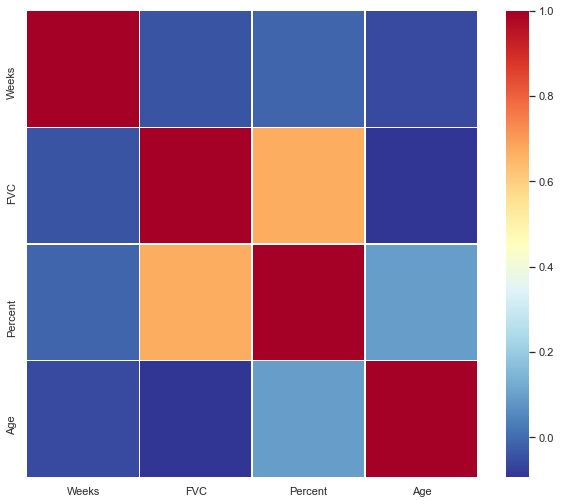

In [34]:
# Mapa de calor para train.csv
import seaborn as sns
sns.set(style="whitegrid")

corrmat = train_df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5)

# Dataframe Por State

In [35]:
Normal_df = train_df[train_df['State'] == 'Normal'].drop_duplicates('Patient').reset_index(drop=True)
Normal_df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,State
0,ID00009637202177434476278,8,3660,85.282878,69,Male,Ex-smoker,Normal
1,ID00010637202177584971671,0,3523,94.724672,60,Male,Ex-smoker,Normal
2,ID00011637202177653955184,6,3326,85.987590,72,Male,Ex-smoker,Normal
3,ID00012637202177665765362,33,3418,93.726006,65,Male,Never smoked,Normal
4,ID00014637202177757139317,0,3807,90.076661,56,Male,Ex-smoker,Normal
...,...,...,...,...,...,...,...,...
90,ID00401637202305320178010,42,2184,80.382775,74,Female,Ex-smoker,Normal
91,ID00407637202308788732304,21,3179,93.764748,66,Male,Ex-smoker,Normal
92,ID00408637202308839708961,13,2651,97.405938,74,Male,Ex-smoker,Normal
93,ID00417637202310901214011,8,3357,82.247158,66,Male,Never smoked,Normal


In [36]:
Slight_df = train_df[train_df['State'] == 'Slight'].drop_duplicates('Patient').reset_index(drop=True)
Slight_df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,State
0,ID00009637202177434476278,45,3390,78.991518,69,Male,Ex-smoker,Slight
1,ID00010637202177584971671,37,2474,66.519682,60,Male,Ex-smoker,Slight
2,ID00014637202177757139317,14,3238,76.613666,56,Male,Ex-smoker,Slight
3,ID00015637202177877247924,12,3042,78.645295,71,Male,Ex-smoker,Slight
4,ID00019637202178323708467,53,1808,79.946938,83,Female,Ex-smoker,Slight
...,...,...,...,...,...,...,...,...
92,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker,Slight
93,ID00421637202311550012437,70,2628,78.720345,68,Male,Ex-smoker,Slight
94,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker,Slight
95,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker,Slight


In [37]:
moderated_df = train_df[train_df['State'] == 'moderated'].drop_duplicates('Patient').reset_index(drop=True)
moderated_df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,State
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker,moderated
1,ID00023637202179104603099,3,1368,58.163265,71,Female,Ex-smoker,moderated
2,ID00025637202179541264076,53,2533,64.374301,65,Male,Ex-smoker,moderated
3,ID00027637202179689871102,12,2472,64.341489,73,Male,Ex-smoker,moderated
4,ID00030637202181211009029,19,2506,59.187530,69,Male,Ex-smoker,moderated
...,...,...,...,...,...,...,...,...
72,ID00405637202308359492977,0,1560,61.821352,61,Female,Never smoked,moderated
73,ID00411637202309374271828,10,1843,51.348490,65,Male,Ex-smoker,moderated
74,ID00414637202310318891556,24,2301,61.164274,65,Male,Never smoked,moderated
75,ID00419637202311204720264,9,2783,64.678814,73,Male,Ex-smoker,moderated


In [38]:
severe_df = train_df[train_df['State'] == 'severe'].drop_duplicates('Patient').reset_index(drop=True)
severe_df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,State
0,ID00052637202186188008618,75,1848,43.783169,54,Male,Ex-smoker,severe
1,ID00073637202198167792918,42,1709,47.466948,69,Male,Ex-smoker,severe
2,ID00075637202198610425520,79,1185,48.420709,52,Female,Never smoked,severe
3,ID00089637202204675567570,31,2076,48.563675,63,Male,Never smoked,severe
4,ID00102637202206574119190,17,1651,44.391267,60,Male,Ex-smoker,severe
5,ID00104637202208063407045,58,1733,49.936607,74,Male,Never smoked,severe
6,ID00109637202210454292264,107,1725,44.898490,73,Male,Ex-smoker,severe
7,ID00110637202210673668310,25,1316,41.352438,74,Male,Ex-smoker,severe
8,ID00123637202217151272140,73,1406,48.628645,69,Female,Never smoked,severe
9,ID00125637202218590429387,20,2093,47.899121,65,Male,Never smoked,severe


In [39]:
very_serious_df = train_df[train_df['State'] == 'very serious'].drop_duplicates('Patient').reset_index(drop=True)
very_serious_df

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,State
0,ID00110637202210673668310,31,1085,34.093766,74,Male,Ex-smoker,very serious
1,ID00367637202296290303449,87,837,34.160477,57,Female,Never smoked,very serious


# Visualización de imágenes

In [40]:
def load_scan(path):
    slices = [pydicom.dcmread(path + '/' + s) for s in os.listdir(path)]
    slices = [s for s in slices if 'SliceLocation' in s]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    for s in slices:
        s.SliceThickness = slice_thickness
    return slices

def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    image = image.astype(np.int16)
    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

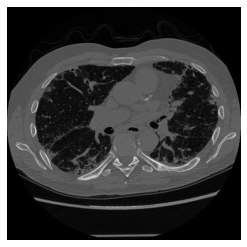

In [41]:
# set path and load files 
path = 'train/ID00007637202177411956430'
patient_dicom = load_scan(path)
patient_pixels = get_pixels_hu(patient_dicom)
#sanity check
plt.imshow(patient_pixels[int(patient_pixels.shape[0]/2)], cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#imwrite("ola.png", patient_pixels[int(patient_pixels.shape[0]/2)])

# Creación de DataSet

In [60]:
for i, pa in enumerate(very_serious_df["Patient"]):
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/very serious/" + str(i) + "_very serious.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2)])

In [ ]:
for i, pa in enumerate(severe_df["Patient"]):
    
    if pa == 'ID00052637202186188008618':
        continue
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/severe/" + str(i) + "_severe.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2)])

In [51]:
for i, pa in enumerate(moderated_df["Patient"]):
    
    if pa == 'ID00052637202186188008618':
        continue
    elif pa == 'ID00132637202222178761324':
        continue
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/moderated/" + str(i) + "_moderated.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2)])

In [ ]:
for i, pa in enumerate(Slight_df["Patient"]):
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/Slight/" + str(i) + "_Slight.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2)])

In [56]:
for i, pa in enumerate(Normal_df["Patient"]):
    
    if pa == 'ID00011637202177653955184':
        continue
    elif pa == 'ID00128637202219474716089':
        continue
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/Normal/" + str(i) + "_Normal.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2)])

In [ ]:
for i, pa in enumerate(very_serious_df["Patient"]):
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/very serious/" + str(i + 2) + "_very serious.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2) - 5])

In [61]:
for i, pa in enumerate(severe_df["Patient"]):
    
    if pa == 'ID00052637202186188008618':
        continue
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/severe/" + str(i + 22) + "_severe.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2) - 5])

In [62]:
for i, pa in enumerate(moderated_df["Patient"]):
    
    if pa == 'ID00052637202186188008618':
        continue
    elif pa == 'ID00132637202222178761324':
        continue
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/moderated/" + str(i + 77) + "_moderated.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2) - 5])

In [63]:
for i, pa in enumerate(Slight_df["Patient"]):
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/Slight/" + str(i + 97) + "_Slight.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2) - 5])

In [64]:
for i, pa in enumerate(Normal_df["Patient"]):
    
    if pa == 'ID00011637202177653955184':
        continue
    elif pa == 'ID00128637202219474716089':
        continue
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/Normal/" + str(i + 95) + "_Normal.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2) - 5])

In [65]:
for i, pa in enumerate(severe_df["Patient"]):
    
    if pa == 'ID00052637202186188008618':
        continue
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/severe/" + str(i + 43) + "_severe.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2) + 5])

In [88]:
for i, pa in enumerate(very_serious_df["Patient"]):
    
    
    path = "train/" + pa
    patient_dicom = load_scan(path)
    patient_pixels = get_pixels_hu(patient_dicom)
    
    save_path = "Imagenes/very serious/" + str(i + 48) + "_very serious.png"
    
    imwrite(save_path, patient_pixels[int(patient_pixels.shape[0]/2) - 28])

# Data Augmentation

In [46]:
from PIL import Image

In [49]:
nombre="Very Serious("
extension=").png"
ruta_original = "Imagenes/very serious/"
ruta_transformada = "Aumentadas/very serious/"
i=1
for i in range(1,51):
  nombre_imagen=nombre+str(i)+extension
  nombre_completo=(ruta_original+nombre_imagen)


  img = Image.open(nombre_completo)
  for j in range(36,396,36):

    imagen_rotate= img.rotate(j)
    imagen_reducida= imagen_rotate.resize((512,512))
    imagen_reducida.save(ruta_transformada+str(j)+nombre_imagen)
    print("imagen: " + str(i)+", grados: "+str(j))

imagen: 1, grados: 36
imagen: 1, grados: 72
imagen: 1, grados: 108
imagen: 1, grados: 144
imagen: 1, grados: 180
imagen: 1, grados: 216
imagen: 1, grados: 252
imagen: 1, grados: 288
imagen: 1, grados: 324
imagen: 1, grados: 360
imagen: 2, grados: 36
imagen: 2, grados: 72
imagen: 2, grados: 108
imagen: 2, grados: 144
imagen: 2, grados: 180
imagen: 2, grados: 216
imagen: 2, grados: 252
imagen: 2, grados: 288
imagen: 2, grados: 324
imagen: 2, grados: 360
imagen: 3, grados: 36
imagen: 3, grados: 72
imagen: 3, grados: 108
imagen: 3, grados: 144
imagen: 3, grados: 180
imagen: 3, grados: 216
imagen: 3, grados: 252
imagen: 3, grados: 288
imagen: 3, grados: 324
imagen: 3, grados: 360
imagen: 4, grados: 36
imagen: 4, grados: 72
imagen: 4, grados: 108
imagen: 4, grados: 144
imagen: 4, grados: 180
imagen: 4, grados: 216
imagen: 4, grados: 252
imagen: 4, grados: 288
imagen: 4, grados: 324
imagen: 4, grados: 360
imagen: 5, grados: 36
imagen: 5, grados: 72
imagen: 5, grados: 108
imagen: 5, grados: 14

imagen: 36, grados: 108
imagen: 36, grados: 144
imagen: 36, grados: 180
imagen: 36, grados: 216
imagen: 36, grados: 252
imagen: 36, grados: 288
imagen: 36, grados: 324
imagen: 36, grados: 360
imagen: 37, grados: 36
imagen: 37, grados: 72
imagen: 37, grados: 108
imagen: 37, grados: 144
imagen: 37, grados: 180
imagen: 37, grados: 216
imagen: 37, grados: 252
imagen: 37, grados: 288
imagen: 37, grados: 324
imagen: 37, grados: 360
imagen: 38, grados: 36
imagen: 38, grados: 72
imagen: 38, grados: 108
imagen: 38, grados: 144
imagen: 38, grados: 180
imagen: 38, grados: 216
imagen: 38, grados: 252
imagen: 38, grados: 288
imagen: 38, grados: 324
imagen: 38, grados: 360
imagen: 39, grados: 36
imagen: 39, grados: 72
imagen: 39, grados: 108
imagen: 39, grados: 144
imagen: 39, grados: 180
imagen: 39, grados: 216
imagen: 39, grados: 252
imagen: 39, grados: 288
imagen: 39, grados: 324
imagen: 39, grados: 360
imagen: 40, grados: 36
imagen: 40, grados: 72
imagen: 40, grados: 108
imagen: 40, grados: 144


In [50]:
nombre="Severe("
extension=").png"
ruta_original = "Imagenes/severe/"
ruta_transformada = "Aumentadas/severe/"
i=1
for i in range(1,64):
  nombre_imagen=nombre+str(i)+extension
  nombre_completo=(ruta_original+nombre_imagen)


  img = Image.open(nombre_completo)
  for j in range(45,405,45):

    imagen_rotate= img.rotate(j)
    imagen_reducida= imagen_rotate.resize((512,512))
    imagen_reducida.save(ruta_transformada+str(j)+nombre_imagen)
    print("imagen: " + str(i)+", grados: "+str(j))

imagen: 1, grados: 45
imagen: 1, grados: 90
imagen: 1, grados: 135
imagen: 1, grados: 180
imagen: 1, grados: 225
imagen: 1, grados: 270
imagen: 1, grados: 315
imagen: 1, grados: 360
imagen: 2, grados: 45
imagen: 2, grados: 90
imagen: 2, grados: 135
imagen: 2, grados: 180
imagen: 2, grados: 225
imagen: 2, grados: 270
imagen: 2, grados: 315
imagen: 2, grados: 360
imagen: 3, grados: 45
imagen: 3, grados: 90
imagen: 3, grados: 135
imagen: 3, grados: 180
imagen: 3, grados: 225
imagen: 3, grados: 270
imagen: 3, grados: 315
imagen: 3, grados: 360
imagen: 4, grados: 45
imagen: 4, grados: 90
imagen: 4, grados: 135
imagen: 4, grados: 180
imagen: 4, grados: 225
imagen: 4, grados: 270
imagen: 4, grados: 315
imagen: 4, grados: 360
imagen: 5, grados: 45
imagen: 5, grados: 90
imagen: 5, grados: 135
imagen: 5, grados: 180
imagen: 5, grados: 225
imagen: 5, grados: 270
imagen: 5, grados: 315
imagen: 5, grados: 360
imagen: 6, grados: 45
imagen: 6, grados: 90
imagen: 6, grados: 135
imagen: 6, grados: 180


imagen: 44, grados: 360
imagen: 45, grados: 45
imagen: 45, grados: 90
imagen: 45, grados: 135
imagen: 45, grados: 180
imagen: 45, grados: 225
imagen: 45, grados: 270
imagen: 45, grados: 315
imagen: 45, grados: 360
imagen: 46, grados: 45
imagen: 46, grados: 90
imagen: 46, grados: 135
imagen: 46, grados: 180
imagen: 46, grados: 225
imagen: 46, grados: 270
imagen: 46, grados: 315
imagen: 46, grados: 360
imagen: 47, grados: 45
imagen: 47, grados: 90
imagen: 47, grados: 135
imagen: 47, grados: 180
imagen: 47, grados: 225
imagen: 47, grados: 270
imagen: 47, grados: 315
imagen: 47, grados: 360
imagen: 48, grados: 45
imagen: 48, grados: 90
imagen: 48, grados: 135
imagen: 48, grados: 180
imagen: 48, grados: 225
imagen: 48, grados: 270
imagen: 48, grados: 315
imagen: 48, grados: 360
imagen: 49, grados: 45
imagen: 49, grados: 90
imagen: 49, grados: 135
imagen: 49, grados: 180
imagen: 49, grados: 225
imagen: 49, grados: 270
imagen: 49, grados: 315
imagen: 49, grados: 360
imagen: 50, grados: 45
ima

In [53]:
nombre="Moderated("
extension=").png"
ruta_original = "Imagenes/moderated/"
ruta_transformada = "Aumentadas/moderated/"
i=1
for i in range(1,151):
  nombre_imagen=nombre+str(i)+extension
  nombre_completo=(ruta_original+nombre_imagen)


  img = Image.open(nombre_completo)
  for j in range(90,450,90):

    imagen_rotate= img.rotate(j)
    imagen_reducida= imagen_rotate.resize((512,512))
    imagen_reducida.save(ruta_transformada+str(j)+nombre_imagen)
    print("imagen: " + str(i)+", grados: "+str(j))

imagen: 1, grados: 120
imagen: 1, grados: 240
imagen: 1, grados: 360
imagen: 2, grados: 120
imagen: 2, grados: 240
imagen: 2, grados: 360
imagen: 3, grados: 120
imagen: 3, grados: 240
imagen: 3, grados: 360
imagen: 4, grados: 120
imagen: 4, grados: 240
imagen: 4, grados: 360
imagen: 5, grados: 120
imagen: 5, grados: 240
imagen: 5, grados: 360
imagen: 6, grados: 120
imagen: 6, grados: 240
imagen: 6, grados: 360
imagen: 7, grados: 120
imagen: 7, grados: 240
imagen: 7, grados: 360
imagen: 8, grados: 120
imagen: 8, grados: 240
imagen: 8, grados: 360
imagen: 9, grados: 120
imagen: 9, grados: 240
imagen: 9, grados: 360
imagen: 10, grados: 120
imagen: 10, grados: 240
imagen: 10, grados: 360
imagen: 11, grados: 120
imagen: 11, grados: 240
imagen: 11, grados: 360
imagen: 12, grados: 120
imagen: 12, grados: 240
imagen: 12, grados: 360
imagen: 13, grados: 120
imagen: 13, grados: 240
imagen: 13, grados: 360
imagen: 14, grados: 120
imagen: 14, grados: 240
imagen: 14, grados: 360
imagen: 15, grados:

imagen: 115, grados: 240
imagen: 115, grados: 360
imagen: 116, grados: 120
imagen: 116, grados: 240
imagen: 116, grados: 360
imagen: 117, grados: 120
imagen: 117, grados: 240
imagen: 117, grados: 360
imagen: 118, grados: 120
imagen: 118, grados: 240
imagen: 118, grados: 360
imagen: 119, grados: 120
imagen: 119, grados: 240
imagen: 119, grados: 360
imagen: 120, grados: 120
imagen: 120, grados: 240
imagen: 120, grados: 360
imagen: 121, grados: 120
imagen: 121, grados: 240
imagen: 121, grados: 360
imagen: 122, grados: 120
imagen: 122, grados: 240
imagen: 122, grados: 360
imagen: 123, grados: 120
imagen: 123, grados: 240
imagen: 123, grados: 360
imagen: 124, grados: 120
imagen: 124, grados: 240
imagen: 124, grados: 360
imagen: 125, grados: 120
imagen: 125, grados: 240
imagen: 125, grados: 360
imagen: 126, grados: 120
imagen: 126, grados: 240
imagen: 126, grados: 360
imagen: 127, grados: 120
imagen: 127, grados: 240
imagen: 127, grados: 360
imagen: 128, grados: 120
imagen: 128, grados: 240


In [ ]:
nombre="Slight("
extension=").png"
ruta_original = "Imagenes/Slight/"
ruta_transformada = "Aumentadas/Slight/"
i=1
for i in range(1,193):
  nombre_imagen=nombre+str(i)+extension
  nombre_completo=(ruta_original+nombre_imagen)


  img = Image.open(nombre_completo)
  for j in range(120,480,120):

    imagen_rotate= img.rotate(j)
    imagen_reducida= imagen_rotate.resize((512,512))
    imagen_reducida.save(ruta_transformada+str(j)+nombre_imagen)
    print("imagen: " + str(i)+", grados: "+str(j))

In [54]:
nombre="Normal("
extension=").png"
ruta_original = "Imagenes/Normal/"
ruta_transformada = "Aumentadas/Normal/"
i=1
for i in range(1,185):
  nombre_imagen=nombre+str(i)+extension
  nombre_completo=(ruta_original+nombre_imagen)


  img = Image.open(nombre_completo)
  for j in range(120,480,120):

    imagen_rotate= img.rotate(j)
    imagen_reducida= imagen_rotate.resize((512,512))
    imagen_reducida.save(ruta_transformada+str(j)+nombre_imagen)
    print("imagen: " + str(i)+", grados: "+str(j))

imagen: 1, grados: 120
imagen: 1, grados: 240
imagen: 1, grados: 360
imagen: 2, grados: 120
imagen: 2, grados: 240
imagen: 2, grados: 360
imagen: 3, grados: 120
imagen: 3, grados: 240
imagen: 3, grados: 360
imagen: 4, grados: 120
imagen: 4, grados: 240
imagen: 4, grados: 360
imagen: 5, grados: 120
imagen: 5, grados: 240
imagen: 5, grados: 360
imagen: 6, grados: 120
imagen: 6, grados: 240
imagen: 6, grados: 360
imagen: 7, grados: 120
imagen: 7, grados: 240
imagen: 7, grados: 360
imagen: 8, grados: 120
imagen: 8, grados: 240
imagen: 8, grados: 360
imagen: 9, grados: 120
imagen: 9, grados: 240
imagen: 9, grados: 360
imagen: 10, grados: 120
imagen: 10, grados: 240
imagen: 10, grados: 360
imagen: 11, grados: 120
imagen: 11, grados: 240
imagen: 11, grados: 360
imagen: 12, grados: 120
imagen: 12, grados: 240
imagen: 12, grados: 360
imagen: 13, grados: 120
imagen: 13, grados: 240
imagen: 13, grados: 360
imagen: 14, grados: 120
imagen: 14, grados: 240
imagen: 14, grados: 360
imagen: 15, grados:

imagen: 115, grados: 120
imagen: 115, grados: 240
imagen: 115, grados: 360
imagen: 116, grados: 120
imagen: 116, grados: 240
imagen: 116, grados: 360
imagen: 117, grados: 120
imagen: 117, grados: 240
imagen: 117, grados: 360
imagen: 118, grados: 120
imagen: 118, grados: 240
imagen: 118, grados: 360
imagen: 119, grados: 120
imagen: 119, grados: 240
imagen: 119, grados: 360
imagen: 120, grados: 120
imagen: 120, grados: 240
imagen: 120, grados: 360
imagen: 121, grados: 120
imagen: 121, grados: 240
imagen: 121, grados: 360
imagen: 122, grados: 120
imagen: 122, grados: 240
imagen: 122, grados: 360
imagen: 123, grados: 120
imagen: 123, grados: 240
imagen: 123, grados: 360
imagen: 124, grados: 120
imagen: 124, grados: 240
imagen: 124, grados: 360
imagen: 125, grados: 120
imagen: 125, grados: 240
imagen: 125, grados: 360
imagen: 126, grados: 120
imagen: 126, grados: 240
imagen: 126, grados: 360
imagen: 127, grados: 120
imagen: 127, grados: 240
imagen: 127, grados: 360
imagen: 128, grados: 120
